In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import re
import nltk
import nltk.corpus
import plotly.graph_objs as go
import plotly.graph_objects as go
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from collections import defaultdict,Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams
from textblob import TextBlob
import os
##from nltk.tokenize import word_tokenize
##from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from plotly.subplots import make_subplots

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Users/shamsiyashams/anaconda3/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

In [6]:
##nltk.download('punkt')
##nltk.download('stopwords')
##nltk.download('vader_lexicon')


In [7]:
AirbnbCleaned_df = pd.read_csv("processed_airbnb.csv")
AirbnbCleaned_df = AirbnbCleaned_df.sample(10000)
AirbnbCleaned_df = AirbnbCleaned_df.dropna()
AirbnbCleaned_df.head()

Unnamed: 0                                           comments  \
51651       51651  ['This house was more than what I was expectin...   
7348         7348  ["Our stay in Timothy's home was amazing. She ...   
10233       10233  ['Peter is a wonderful host.  We were his firs...   
39179       39179  ['I thoroughly enjoyed my stay, the location i...   
690           690  ["We stayed for a week in the apartment, amazi...   

       positive_comment  negative_comment  neutral_comment  \
51651                 2                 0                0   
7348                143                 3                1   
10233                 6                 0                0   
39179                 3                 0                0   
690                  48                 4                1   

                       id   neighbourhood  \
51651  744752702169831094         Lambeth   
7348             11234733  Waltham Forest   
10233            14836690       Islington   
39179            52938325          Barnet   
690                675078          Newham   

                                                    name        room_type  \
51651         Gorgeous 4 bedroom Victorian terrace house  Entire home/apt   
7348    Unique detached Victorian Cottage in the Village     Private room   
10233  Scandinavian Style Home in the Heart of Angel ...  Entire home/apt   
39179    Compact Studio everything you need, bright WiFi  Entire home/apt   
690                   2 Bed Ideal for Excel /River Views  Entire home/apt   

       price  
51651    425  
7348      37  
10233    235  
39179     59  
690      150

In [3]:
del AirbnbCleaned_df["Unnamed: 0"]
del AirbnbCleaned_df["Unnamed: 0.1"]
AirbnbCleaned_df.head()
AirbnbCleaned_df.shape

(9999, 9)

In [4]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

AirbnbCleaned_df['Subjectivity'] = AirbnbCleaned_df['comments'].apply(getSubjectivity)
AirbnbCleaned_df['Polarity'] = AirbnbCleaned_df['comments'].apply(getPolarity)

AirbnbCleaned_df

comments  positive_comment  \
41701  ['Fatiha was an interesting person and hospita...                 5   
24024  ['Great location, spacious, wi-fi is good, and...                 2   
11095  ['El apartamento es guapísimo, limpio y muy lu...                16   
390    ['I enjoyed my stay here.  The room was comfor...                45   
7579   ['Siobhan was a very attentive and welcoming h...                46   
...                                                  ...               ...   
49271  ['Excellent flat and location', 'Great place t...                 2   
20776  ['Nous avons vraiment apprécié notre séjour, p...                34   
38546  ['The flat was beautiful and the hosts were su...                 5   
22272  ['Joanna was really straightforward and easy t...                30   
36012  ['A very lovely flat to live for several days ...                 2   

       negative_comment  neutral_comment        id           neighbourhood  \
41701                 1                0  35608995                  Ealing   
24024                 0                0  21535887                  Newham   
11095                 5                0  12051255                 Hackney   
390                   2                2    388030  Hammersmith and Fulham   
7579                  2                1   7950618                 Hackney   
...                 ...              ...       ...                     ...   
49271                 0                0  41104824  Hammersmith and Fulham   
20776                 4                1  19567227                 Enfield   
38546                 0                0  33030823             Westminster   
22272                 1                2  20431921  Hammersmith and Fulham   
36012                 1                0  30783126               Islington   

                                                    name        room_type  \
41701              Spacious private room in modern house     Private room   
24024       Bright & tidy one room apartment East London  Entire home/apt   
11095               Bright, Cozy Apartment in Shoreditch  Entire home/apt   
390                                       Single bedroom     Private room   
7579                         Cosy garden flat in Hackney  Entire home/apt   
...                                                  ...              ...   
49271   Home away from home by the river Thames, Chelsea  Entire home/apt   
20776              Tranquil apartment with stunning view  Entire home/apt   
38546  CENTRAL London Luxury - Minutes Walk to OXFORD ST  Entire home/apt   
22272              Stunning, Bright, Cosy Flat in Zone 2  Entire home/apt   
36012                   Central one bed flat with garden  Entire home/apt   

       price  Subjectivity  Polarity  
41701     35      0.693333  0.366863  
24024     50      0.700000  0.833333  
11095    140      0.598678  0.349818  
390       30      0.584903  0.351987  
7579      80      0.588486  0.346648  
...      ...           ...       ...  
49271     30      0.583148  0.444630  
20776    115      0.627007  0.411243  
38546    140      0.515854  0.246016  
22272     69      0.576850  0.358715  
36012     68      0.574744  0.371515  

[9999 rows x 11 columns]

In [5]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

AirbnbCleaned_df['Analysis'] = AirbnbCleaned_df['Polarity'].apply(getAnalysis)
AirbnbCleaned_df

comments  positive_comment  \
41701  ['Fatiha was an interesting person and hospita...                 5   
24024  ['Great location, spacious, wi-fi is good, and...                 2   
11095  ['El apartamento es guapísimo, limpio y muy lu...                16   
390    ['I enjoyed my stay here.  The room was comfor...                45   
7579   ['Siobhan was a very attentive and welcoming h...                46   
...                                                  ...               ...   
49271  ['Excellent flat and location', 'Great place t...                 2   
20776  ['Nous avons vraiment apprécié notre séjour, p...                34   
38546  ['The flat was beautiful and the hosts were su...                 5   
22272  ['Joanna was really straightforward and easy t...                30   
36012  ['A very lovely flat to live for several days ...                 2   

       negative_comment  neutral_comment        id           neighbourhood  \
41701                 1                0  35608995                  Ealing   
24024                 0                0  21535887                  Newham   
11095                 5                0  12051255                 Hackney   
390                   2                2    388030  Hammersmith and Fulham   
7579                  2                1   7950618                 Hackney   
...                 ...              ...       ...                     ...   
49271                 0                0  41104824  Hammersmith and Fulham   
20776                 4                1  19567227                 Enfield   
38546                 0                0  33030823             Westminster   
22272                 1                2  20431921  Hammersmith and Fulham   
36012                 1                0  30783126               Islington   

                                                    name        room_type  \
41701              Spacious private room in modern house     Private room   
24024       Bright & tidy one room apartment East London  Entire home/apt   
11095               Bright, Cozy Apartment in Shoreditch  Entire home/apt   
390                                       Single bedroom     Private room   
7579                         Cosy garden flat in Hackney  Entire home/apt   
...                                                  ...              ...   
49271   Home away from home by the river Thames, Chelsea  Entire home/apt   
20776              Tranquil apartment with stunning view  Entire home/apt   
38546  CENTRAL London Luxury - Minutes Walk to OXFORD ST  Entire home/apt   
22272              Stunning, Bright, Cosy Flat in Zone 2  Entire home/apt   
36012                   Central one bed flat with garden  Entire home/apt   

       price  Subjectivity  Polarity  Analysis  
41701     35      0.693333  0.366863  Positive  
24024     50      0.700000  0.833333  Positive  
11095    140      0.598678  0.349818  Positive  
390       30      0.584903  0.351987  Positive  
7579      80      0.588486  0.346648  Positive  
...      ...           ...       ...       ...  
49271     30      0.583148  0.444630  Positive  
20776    115      0.627007  0.411243  Positive  
38546    140      0.515854  0.246016  Positive  
22272     69      0.576850  0.358715  Positive  
36012     68      0.574744  0.371515  Positive  

[9999 rows x 12 columns]

In [6]:
AirbnbCleaned_df.describe()

positive_comment  negative_comment  neutral_comment            id  \
count       9999.000000       9999.000000      9999.000000  9.999000e+03   
mean          18.632563          2.376338         0.627763  2.391341e+07   
std           36.094589          4.938680         1.681850  1.265438e+07   
min            0.000000          0.000000         0.000000  1.740200e+04   
25%            2.000000          0.000000         0.000000  1.400243e+07   
50%            6.000000          1.000000         0.000000  2.366411e+07   
75%           20.000000          2.000000         1.000000  3.470032e+07   
max          668.000000         83.000000        23.000000  4.795722e+07   

              price  Subjectivity     Polarity  
count   9999.000000   9999.000000  9999.000000  
mean     107.126013      0.577901     0.352990  
std      352.359460      0.152689     0.148970  
min        8.000000      0.000000    -1.000000  
25%       42.000000      0.555654     0.304636  
50%       74.000000      0.597001     0.362247  
75%      120.000000      0.638333     0.414669  
max    15971.000000      1.000000     1.000000

In [7]:
AirbnbCleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 41701 to 36012
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   comments          9999 non-null   object 
 1   positive_comment  9999 non-null   int64  
 2   negative_comment  9999 non-null   int64  
 3   neutral_comment   9999 non-null   int64  
 4   id                9999 non-null   int64  
 5   neighbourhood     9999 non-null   object 
 6   name              9999 non-null   object 
 7   room_type         9999 non-null   object 
 8   price             9999 non-null   int64  
 9   Subjectivity      9999 non-null   float64
 10  Polarity          9999 non-null   float64
 11  Analysis          9999 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1015.5+ KB


In [8]:
AirbnbCleaned_df.isna().mean()*100

comments            0.0
positive_comment    0.0
negative_comment    0.0
neutral_comment     0.0
id                  0.0
neighbourhood       0.0
name                0.0
room_type           0.0
price               0.0
Subjectivity        0.0
Polarity            0.0
Analysis            0.0
dtype: float64

In [9]:
AirbnbCleaned_df.isnull().any()

comments            False
positive_comment    False
negative_comment    False
neutral_comment     False
id                  False
neighbourhood       False
name                False
room_type           False
price               False
Subjectivity        False
Polarity            False
Analysis            False
dtype: bool

In [10]:
# Drop duplicates
AirbnbCleaned_df.drop_duplicates()
print(" Shape of dataframe after dropping duplicates: ", AirbnbCleaned_df.shape)

 Shape of dataframe after dropping duplicates:  (9999, 12)


In [11]:
#Null values
null= AirbnbCleaned_df.isnull().sum().sort_values(ascending=False)
total =AirbnbCleaned_df.shape[0]
percent_missing= (AirbnbCleaned_df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data)

Null Values in each column:
          column name  Total missing  Percent missing
0           comments              0              0.0
1   positive_comment              0              0.0
2   negative_comment              0              0.0
3    neutral_comment              0              0.0
4                 id              0              0.0
5      neighbourhood              0              0.0
6               name              0              0.0
7          room_type              0              0.0
8              price              0              0.0
9       Subjectivity              0              0.0
10          Polarity              0              0.0
11          Analysis              0              0.0


In [12]:
print(AirbnbCleaned_df.Analysis.unique())
print(AirbnbCleaned_df.Analysis.value_counts())

['Positive' 'Negative' 'Neutral']
Positive    9435
Neutral      475
Negative      89
Name: Analysis, dtype: int64


In [ ]:
Sentiment Score

In [13]:
#pre- processing
#Remove Urls and HTML links
def remove_urls(comments):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', comments)
AirbnbCleaned_df['comments']=AirbnbCleaned_df['comments'].apply(lambda x:remove_urls(x))

def remove_html(comments):
    html=re.compile(r'<.*?>')
    return html.sub(r'',comments)
AirbnbCleaned_df['comments']=AirbnbCleaned_df['comments'].apply(lambda x:remove_html(x))


# Lower casing
def lower(comments):
    low_text= comments.lower()
    return low_text
AirbnbCleaned_df['comments']=AirbnbCleaned_df['comments'].apply(lambda x:lower(x))


# Number removal
def remove_num(comments):
    remove= re.sub(r'\d+', '', comments)
    return remove
AirbnbCleaned_df['comments']=AirbnbCleaned_df['comments'].apply(lambda x:remove_num(x))


#Remove stopwords & Punctuations
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

def punct_remove(comments):
    punct = re.sub(r"[^\w\s\d]","", comments)
    return punct
AirbnbCleaned_df['comments']=AirbnbCleaned_df['comments'].apply(lambda x:punct_remove(x))



In [14]:
# cleaning numbers and special characters
AirbnbCleaned_df['comments'] = AirbnbCleaned_df['comments'].str.replace(r"[\"\'\|\?\=\.\@\#\*\,]", '')

In [15]:
# Passing the string text into word tokenize for breaking the sentences
Token_list=[]
for Airbnb_df in AirbnbCleaned_df['comments']: 
    Token_list.append(word_tokenize(Airbnb_df))

# looking at the content of the first review as a set of tokens, and the rating.
print(Token_list[0])
print(AirbnbCleaned_df)

['fatiha', 'was', 'an', 'interesting', 'person', 'and', 'hospitable', 'the', 'place', 'as', 'as', 'described', 'very', 'clean', 'and', 'had', 'everything', 'i', 'needed', 'it', 'was', 'set', 'a', 'bit', 'away', 'from', 'the', 'road', 'which', 'helped', 'it', 'being', 'quiet', 'during', 'the', 'night', 'parking', 'was', 'a', 'little', 'tricky', 'but', 'always', 'managed', 'to', 'find', 'a', 'place', 'during', 'my', 'stay', 'it', 'was', 'also', 'a', 'short', 'walk', 'into', 'the', 'town', 'for', 'food', 'an', 'amenities', 'fantastic', 'host', 'fatiha', 'is', 'a', 'lovely', 'hostshe', 'is', 'very', 'friendly', 'her', 'modern', 'house', 'is', 'very', 'clean', 'close', 'to', 'the', 'bus', 'stop', 'easy', 'to', 'walk', 'to', 'the', 'street', 'i', 'recommend', 'her', 'modern', 'house', 'to', 'everyone', 'who', 'like', 'to', 'make', 'stay', 'good', 'buona', 'posizione', 'se', 'cercate', 'un', 'posto', 'a', 'greenford', 'pretty', 'nice', 'stay', 'at', 'fatihas', 'house', 'the', 'bedroom', 'and'

In [16]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)# pronouns and prepositions mainly
# importing stopwors from nltk library
from nltk import word_tokenize
from nltk.corpus import stopwords
a = set(stopwords.words('english'))
for i in range (0,len(Token_list)):
    Token_list[i] =[word for word in Token_list[i] if word not in a ] 
print(Token_list[5])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
from nltk.util import ngrams

def words_to_ngrams(words, n, sep=" "):
    return [sep.join(words[i:i+n]) for i in range(len(words)-n+1)]

print("Bigrams: ", words_to_ngrams(Token_list[0],2))
print("\nTrigrams: ",words_to_ngrams(Token_list[0],3))

Bigrams:  ['fatiha interesting', 'interesting person', 'person hospitable', 'hospitable place', 'place described', 'described clean', 'clean everything', 'everything needed', 'needed set', 'set bit', 'bit away', 'away road', 'road helped', 'helped quiet', 'quiet night', 'night parking', 'parking little', 'little tricky', 'tricky always', 'always managed', 'managed find', 'find place', 'place stay', 'stay also', 'also short', 'short walk', 'walk town', 'town food', 'food amenities', 'amenities fantastic', 'fantastic host', 'host fatiha', 'fatiha lovely', 'lovely hostshe', 'hostshe friendly', 'friendly modern', 'modern house', 'house clean', 'clean close', 'close bus', 'bus stop', 'stop easy', 'easy walk', 'walk street', 'street recommend', 'recommend modern', 'modern house', 'house everyone', 'everyone like', 'like make', 'make stay', 'stay good', 'good buona', 'buona posizione', 'posizione se', 'se cercate', 'cercate un', 'un posto', 'posto greenford', 'greenford pretty', 'pretty nice'

In [18]:
# finding the frequency distinct in the tokens
# Importing FreqDist library from nltk and passing token into FreqDist
from nltk.probability import FreqDist
fdist = FreqDist()
for i in range (0,len(Token_list)):
    for word in Token_list[i]:
        fdist[word.lower()]+=1
fdist

FreqDist({'great': 98423, 'stay': 87370, 'place': 79756, 'location': 62487, 'london': 58948, 'clean': 56317, 'host': 50812, 'nice': 47959, 'room': 45734, 'flat': 43365, ...})

In [19]:
#Concatenate the words together for each document or review
word_concat=[' '.join(word) for word in  Token_list]

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(word_concat)

print (text_tf.todense())

MemoryError: Unable to allocate 12.9 GiB for an array with shape (9999, 173600) and data type float64

In [21]:
X =text_tf

In [22]:
y=AirbnbCleaned_df['Analysis']
#encode the labels from strings to values.
le = LabelEncoder()
y = le.fit_transform(y)
print(le.classes_)
y

['Negative' 'Neutral' 'Positive']


array([2, 2, 2, ..., 2, 2, 2])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, 'is the shape of the training set')
print(y_train.shape, 'is the shape of the training labels')
print(X_test.shape, 'is the shape of the training set')
print(y_test.shape, 'is the shape of the training labels')

(7999, 173600) is the shape of the training set
(7999,) is the shape of the training labels
(2000, 173600) is the shape of the training set
(2000,) is the shape of the training labels


In [24]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion='entropy',max_depth= 60,class_weight='balanced')
clf.fit(X_train,y_train);
y_pred = clf.predict(X_test)
y_pred

array([2, 2, 2, ..., 2, 2, 2])

Results on the test set:
              precision    recall  f1-score   support

           0       0.05      0.20      0.08         5
           1       0.94      0.69      0.79       126
           2       0.98      0.99      0.99      1869

    accuracy                           0.97      2000
   macro avg       0.66      0.63      0.62      2000
weighted avg       0.98      0.97      0.97      2000



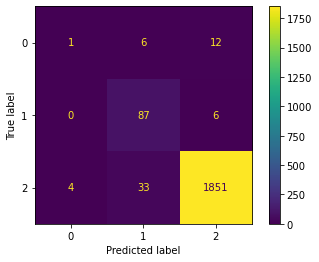

In [25]:
#we can get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
#we can plot it
plot_confusion_matrix(clf, X_test, y_test)
print('Results on the test set:')
print(classification_report(y_pred, y_test))

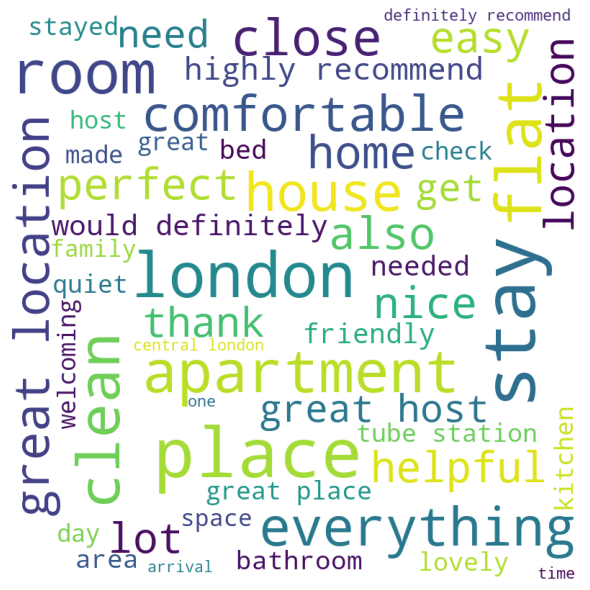

In [26]:
words = ''

# iterate through the text attribute in the dataframe splitting the text into the component tokens
for val in AirbnbCleaned_df['comments'] :      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    words += " ".join(tokens)+" "

    # importing all necessery modules
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = a,#We don't want to see stopwords in the word clous
                min_font_size = 10,
                max_font_size=100, 
                max_words=50).generate(words)
                                             
                                              
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

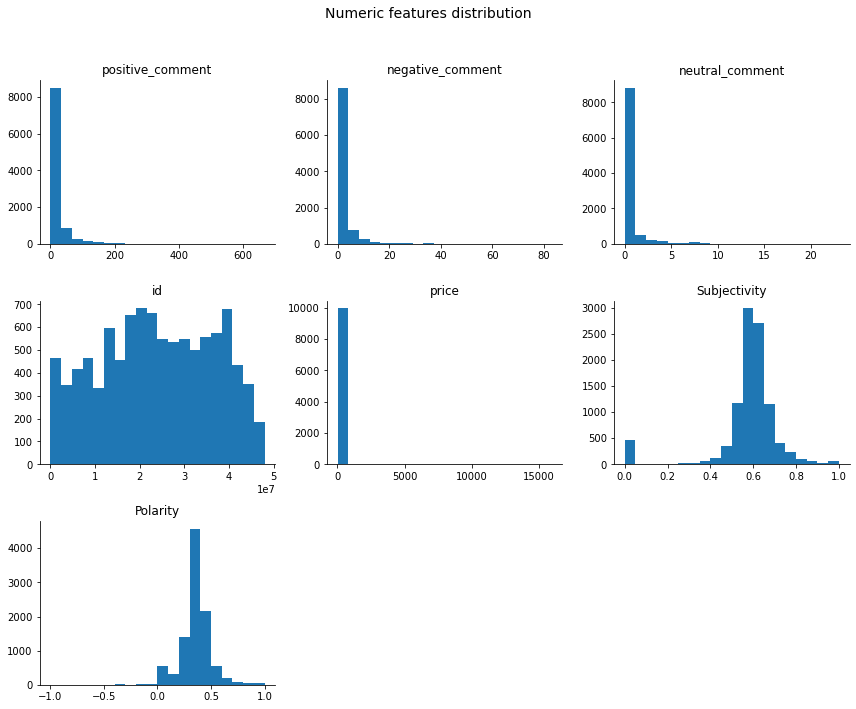

In [27]:
AirbnbCleaned_df.hist(figsize=(12, 10), bins=20, grid=False)
sns.despine()
plt.suptitle('Numeric features distribution', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])

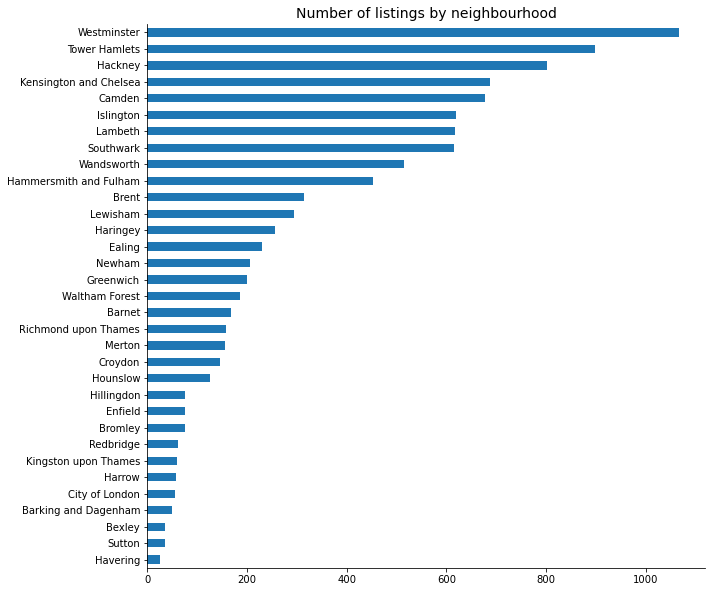

In [28]:
AirbnbCleaned_df['neighbourhood'].value_counts().sort_values().plot.barh(figsize=(10, 10));
sns.despine()
plt.title('Number of listings by neighbourhood', fontsize=14);

In [29]:
#class distribution
class_df = AirbnbCleaned_df.groupby('Analysis').count()['comments'].reset_index().sort_values(by='comments',ascending=False)
class_df.style.background_gradient(cmap='winter')

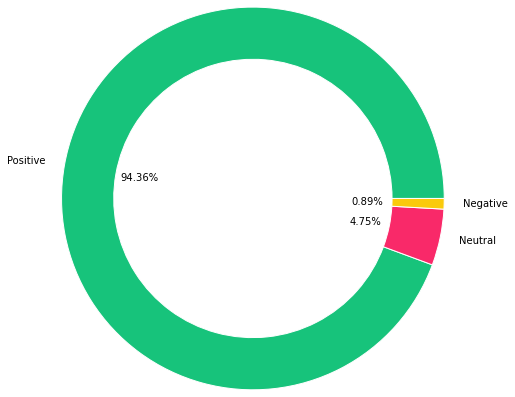

In [30]:
percent_class=class_df.comments
labels= class_df.Analysis
colors = ['#17C37B','#F92969','#FACA0C']
my_pie,_,_ = plt.pie(percent_class,radius = 2.2,labels=labels,colors=colors,autopct="%.2f%%")
plt.setp(my_pie, width=0.6, edgecolor='white') 
plt.show()

In [31]:
fig=make_subplots(1, subplot_titles=('Sentiment Analysis'))
x=AirbnbCleaned_df.Analysis.value_counts()
fig.add_trace(go.Bar(x=x.index,y=x.values,marker_color=['#17C37B','#F92969','#FACA0C'],name='Sentiment Analysis'),row=1,col=1)

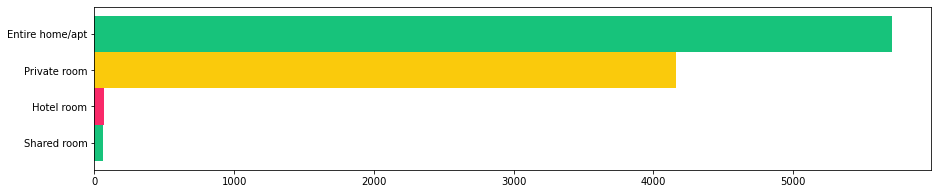

In [32]:
freq = AirbnbCleaned_df['room_type'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15,3), width=1, color = ["#17C37B","#F92969","#FACA0C"])
plt.show()

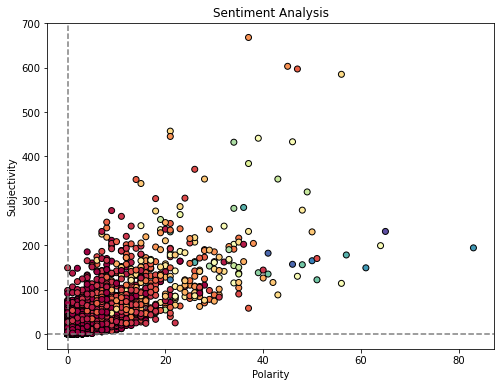

In [33]:
AirbnbCleaned_df.dropna(inplace=True)
AirbnbCleaned_df.reset_index(drop=True, inplace=True)
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6
plt.scatter(AirbnbCleaned_df['negative_comment'], AirbnbCleaned_df['positive_comment']
            , c=AirbnbCleaned_df['neutral_comment'], cmap='Spectral', edgecolor='k', label='Positive')
plt.axvline(0, c=(.5, .5, .5), ls = '--')
plt.axhline(0, c=(.5, .5, .5), ls = '--')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

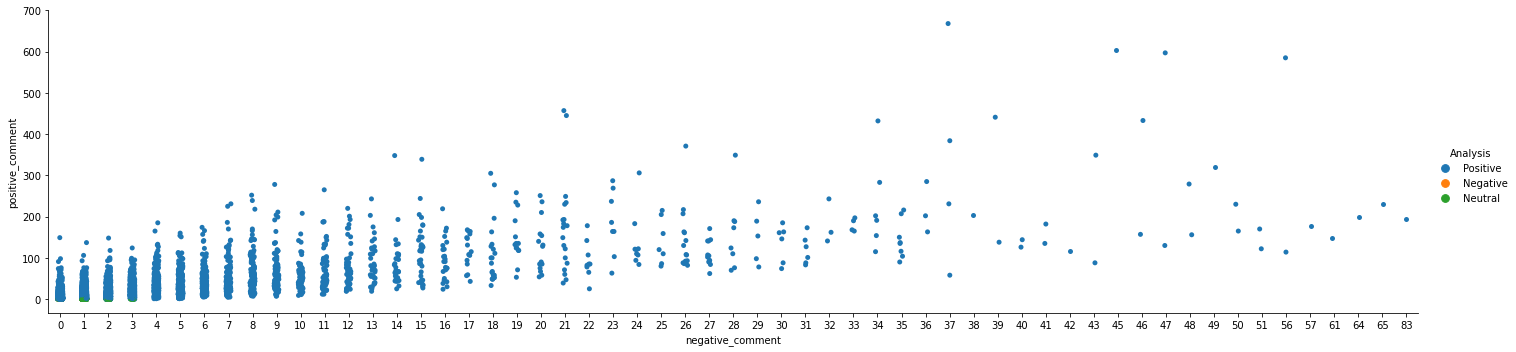

In [34]:
sns.catplot(x='negative_comment', y='positive_comment',hue="Analysis",data=AirbnbCleaned_df, height=5, aspect=4)

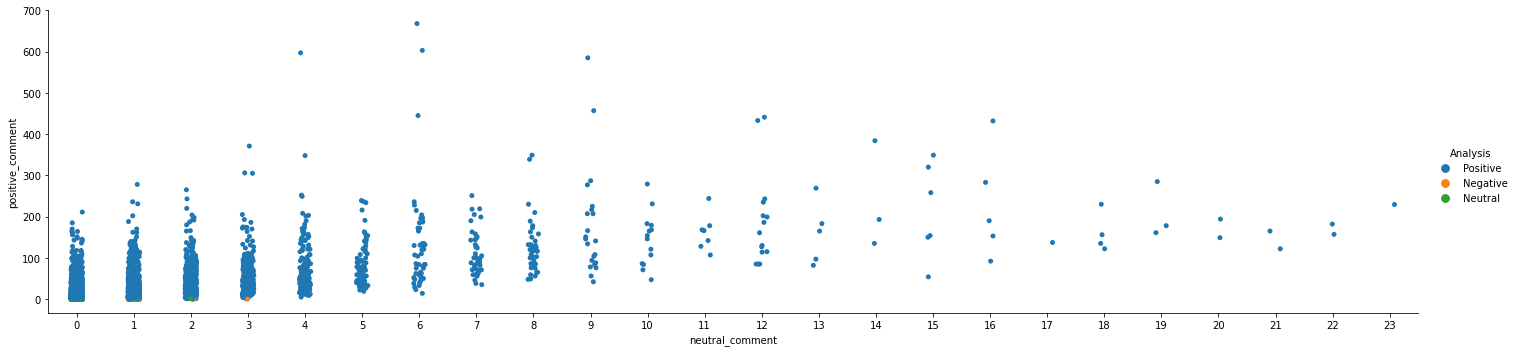

In [35]:
sns.catplot(x='neutral_comment', y='positive_comment',hue="Analysis",data=AirbnbCleaned_df, height=5, aspect=4)

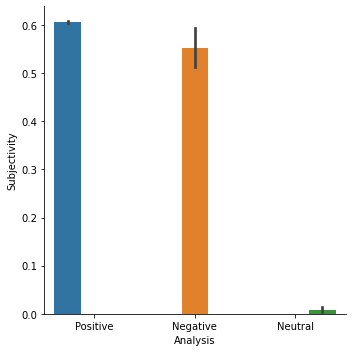

In [36]:
sns.catplot(x='Analysis', y='Subjectivity', hue="Analysis", kind="bar", data=AirbnbCleaned_df)

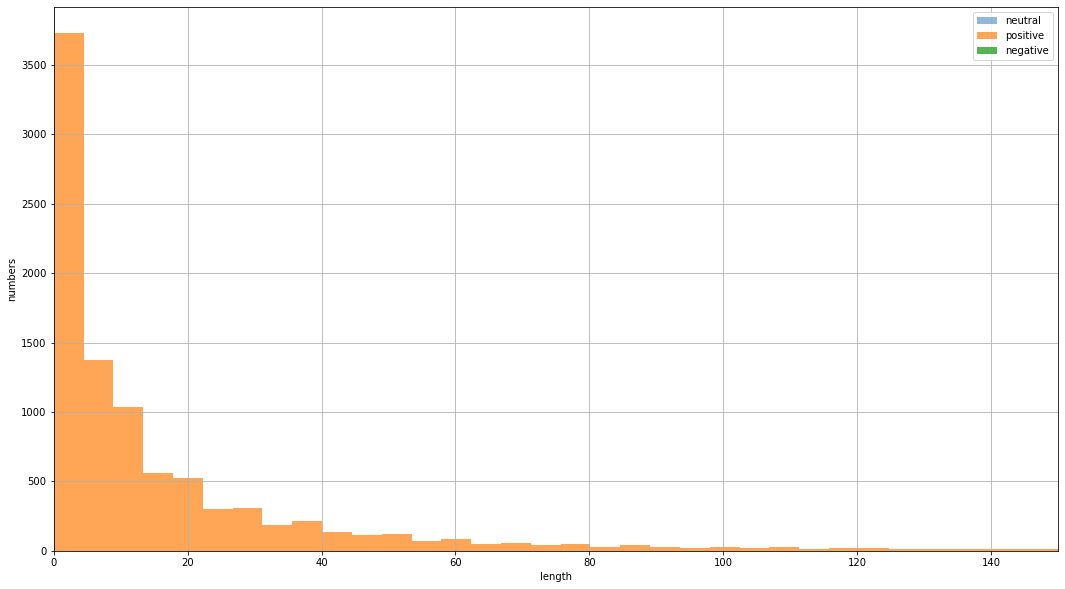

In [37]:
AirbnbCleaned_df['Analysis'] = AirbnbCleaned_df['Analysis']

plt.rcParams['figure.figsize'] = (18.0, 10.0)
bins = 150
plt.hist(AirbnbCleaned_df[AirbnbCleaned_df['Analysis'] == "Neutral"]['neutral_comment'], alpha = 0.5, bins=bins, label='neutral')
plt.hist(AirbnbCleaned_df[AirbnbCleaned_df['Analysis'] == "Positive"]['positive_comment'], alpha = 0.7, bins=bins, label='positive')
plt.hist(AirbnbCleaned_df[AirbnbCleaned_df['Analysis'] == "Negative"]['negative_comment'], alpha = 0.8, bins=bins, label='negative')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

In [38]:
AirbnbCleaned_df.dropna(inplace=True)
AirbnbCleaned_df.reset_index(drop=True, inplace=True)

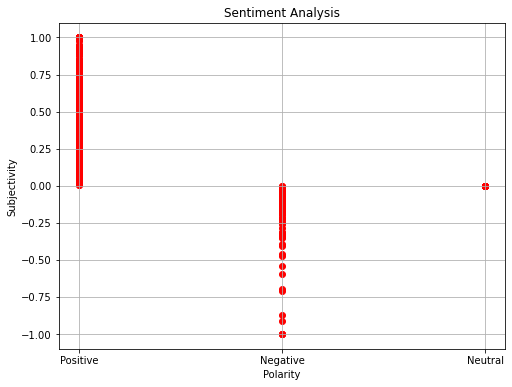

In [39]:
plt.figure(figsize=(8,6))
for i in range(0, AirbnbCleaned_df.shape[0]):
    plt.scatter(AirbnbCleaned_df['Analysis'][i], AirbnbCleaned_df['Polarity'][i], color='red', label='Polarity')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid()
plt.show()

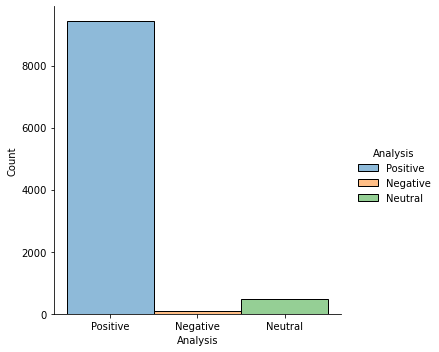

In [40]:
sns.displot(AirbnbCleaned_df, x="Analysis", hue="Analysis")

<AxesSubplot:xlabel='negative_comment', ylabel='Density'>

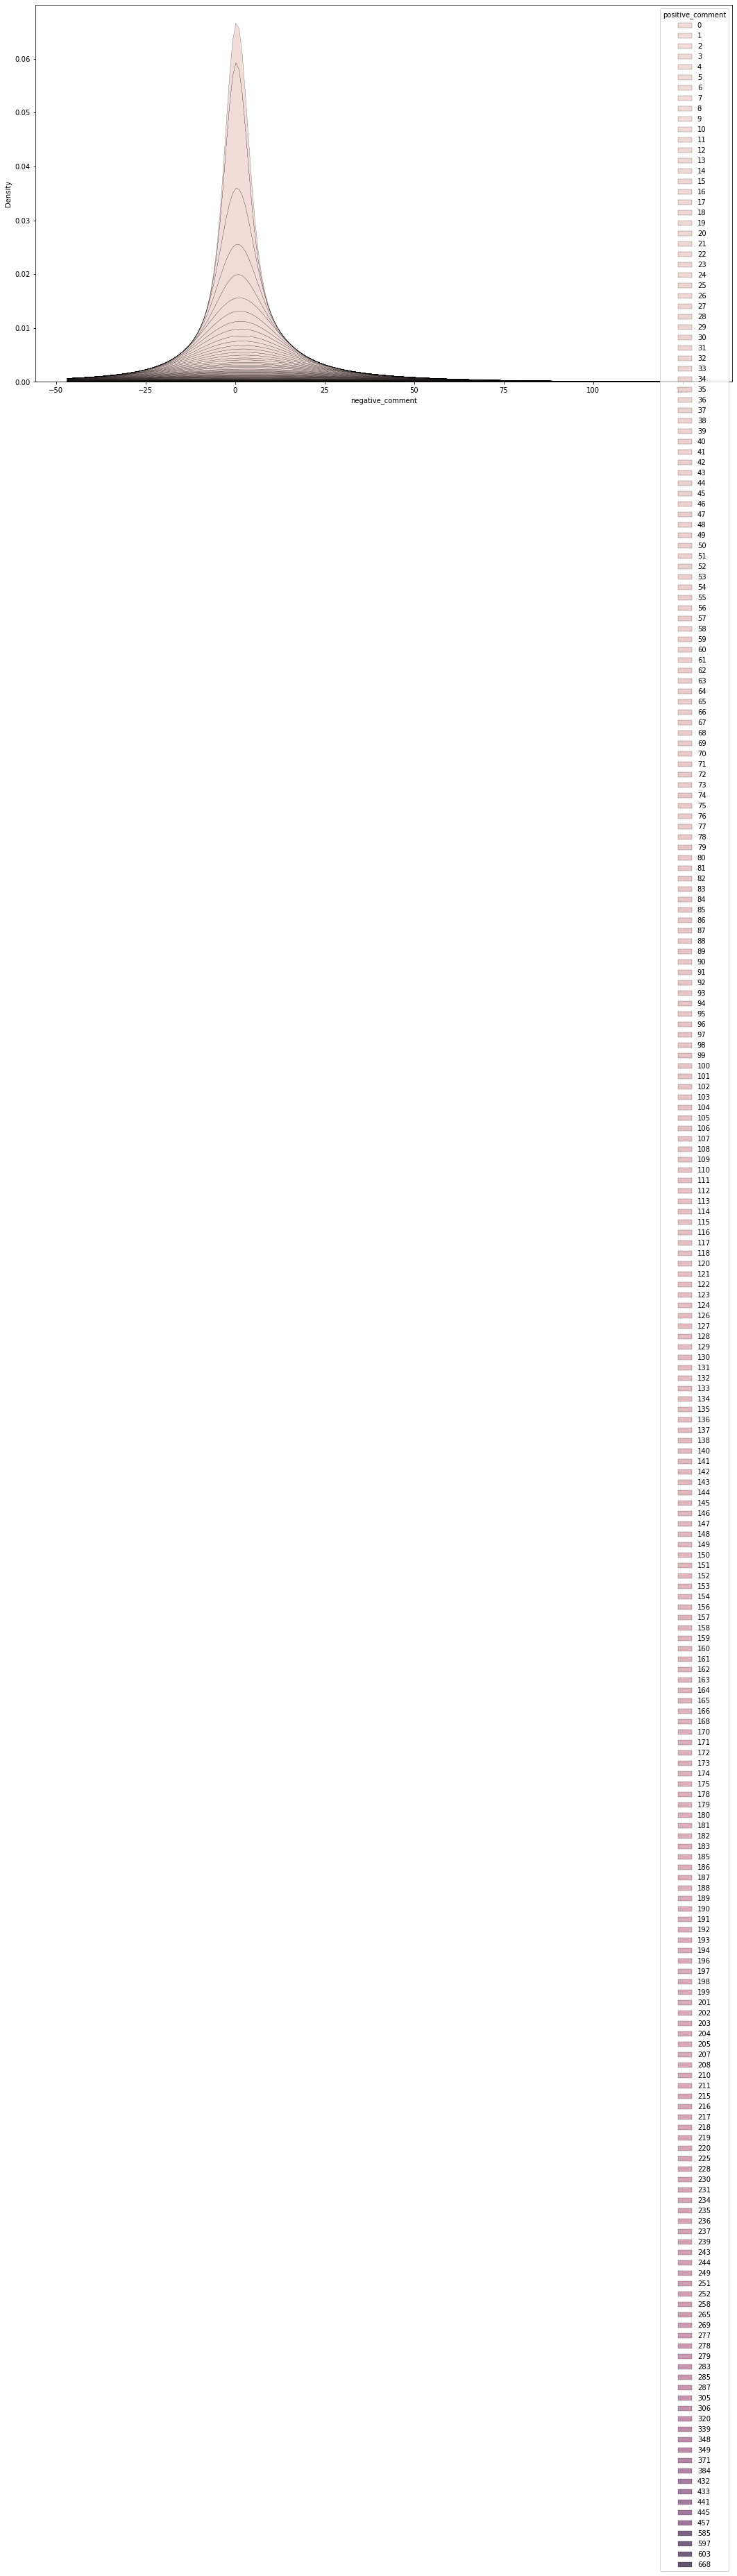

In [44]:
sns.kdeplot(data=AirbnbCleaned_df,x='negative_comment',hue='positive_comment',multiple='stack',linewidth=0.2,bw_adjust=20)

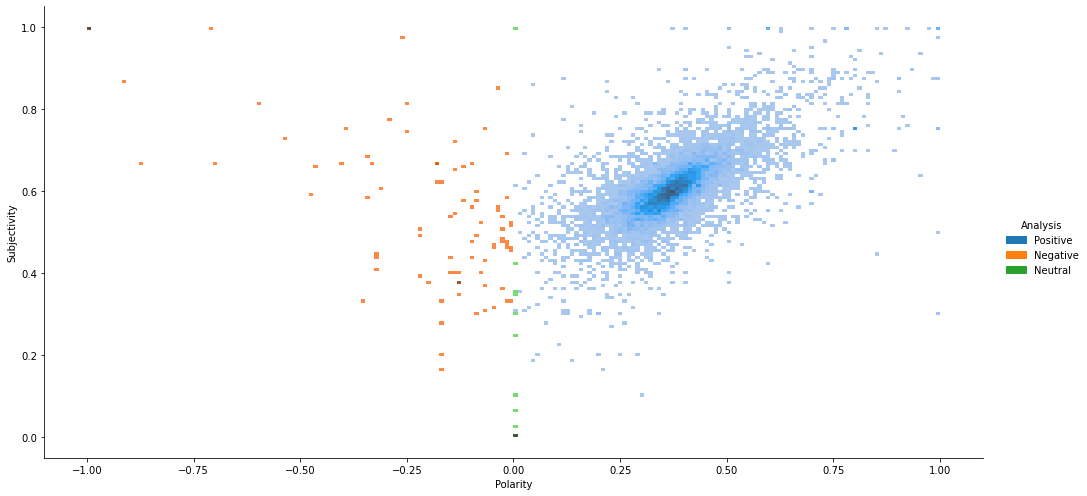

In [88]:
sns.displot(AirbnbCleaned_df, x="Polarity",y='Subjectivity', hue="Analysis", common_norm=False, linewidth=8, 
            height=7, aspect=2)

In [46]:
fig=make_subplots(1, subplot_titles=('Neighbourhood'))
x=AirbnbCleaned_df.neighbourhood.value_counts()
fig.add_trace(go.Bar(x=x.index,y=x.values,marker_color='#17C37B',name='Neighbourhood'),row=1,col=1)

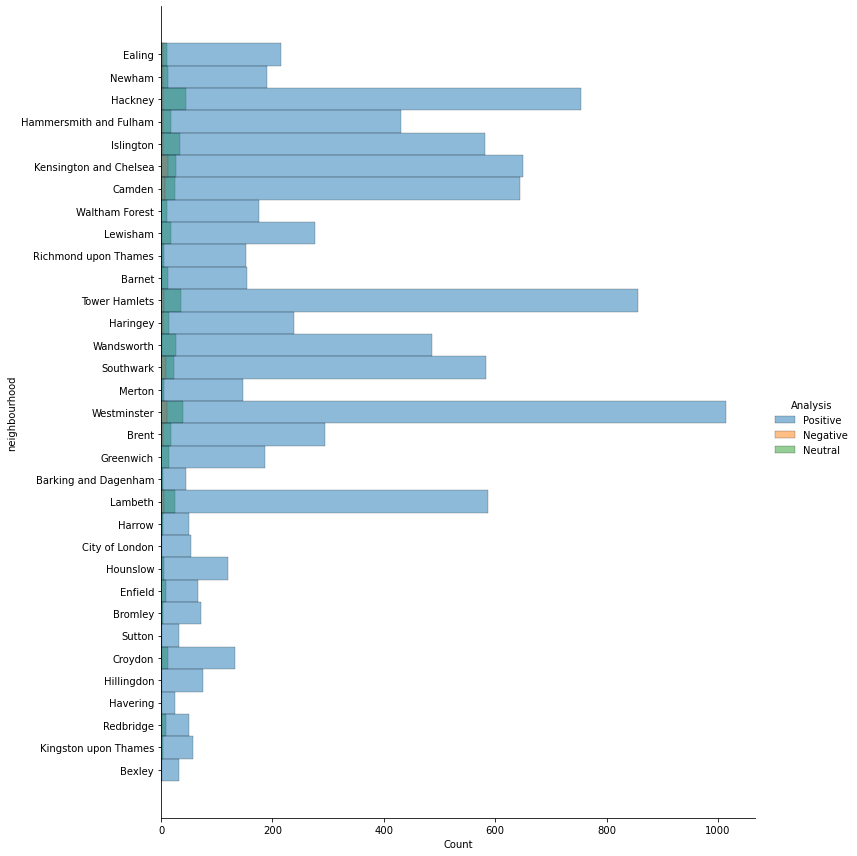

In [76]:
sns.displot(AirbnbCleaned_df, y="neighbourhood", hue="Analysis", linewidth=0.2, height=12, aspect=.9)

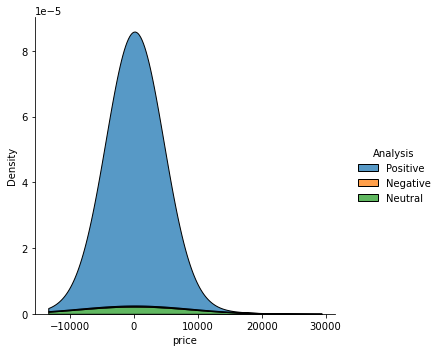

In [47]:
sns.displot(AirbnbCleaned_df, x="price", hue="Analysis", kind="kde", multiple="stack" , bw_adjust=80)

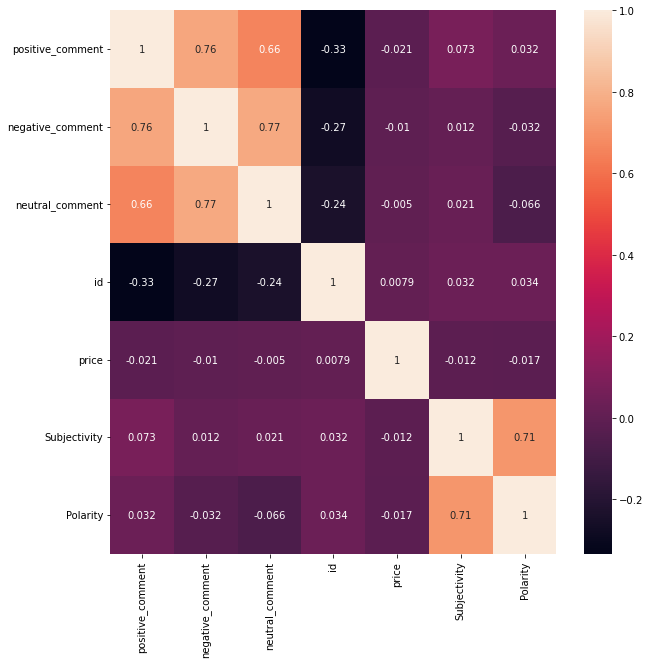

In [91]:
plt.figure(figsize=(10,10))
sns.heatmap(Airbnb_dataframe.corr(), annot=True)
plt.show()

In [93]:
neg_words = ''
Negative_test = AirbnbCleaned_df.loc[AirbnbCleaned_df.Analysis == 'Negative']
# iterate through the text attribute in the dataframe splitting the text into the component tokens
for val in Negative_test['comments'] :
    # typecaste each val to string
    val = str(val)

# split the value
tokens = val.split()

# Converts each token into lowercase
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

neg_words +=" ".join(tokens)+" "
#neg_words = neg_words.lstrip('')


#words += " ".join(tokens)+" "

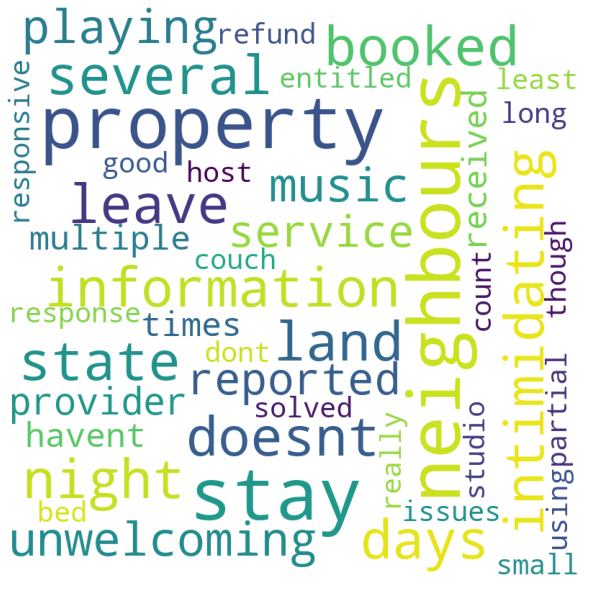

In [95]:
#importing all necessery modules
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS



wordcloud = WordCloud(width = 800, height = 800,
background_color ='white',
stopwords = a,#We don't want to see stopwords in the word clous
min_font_size = 10,
max_font_size=100,
max_words=50).generate(neg_words)


# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [99]:
pos_words = ''
Positive_test = AirbnbCleaned_df.loc[AirbnbCleaned_df.Analysis == 'Positive']
# iterate through the text attribute in the dataframe splitting the text into the component tokens
for val in Positive_test['comments'] :
    # typecaste each val to string
    val = str(val)

# split the value
tokens = val.split()

# Converts each token into lowercase
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

pos_words +=" ".join(tokens)+" "
#neg_words = neg_words.lstrip('')


#words += " ".join(tokens)+" "

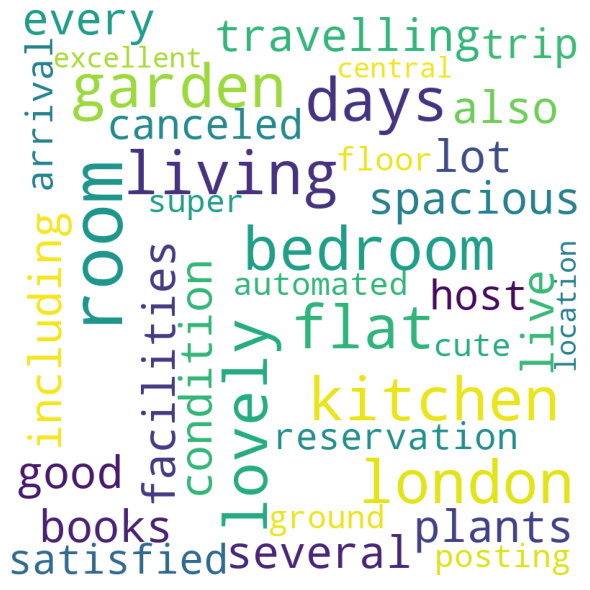

In [100]:
#importing all necessery modules
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS



wordcloud = WordCloud(width = 800, height = 800,
background_color ='white',
stopwords = a,#We don't want to see stopwords in the word clous
min_font_size = 10,
max_font_size=100,
max_words=50).generate(pos_words)


# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [101]:
neu_words = ''
Neutral_test = AirbnbCleaned_df.loc[AirbnbCleaned_df.Analysis == 'Neutral']
# iterate through the text attribute in the dataframe splitting the text into the component tokens
for val in Neutral_test['comments'] :
    # typecaste each val to string
    val = str(val)

# split the value
tokens = val.split()

# Converts each token into lowercase
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

neu_words +=" ".join(tokens)+" "
#neg_words = neg_words.lstrip('')


#words += " ".join(tokens)+" "

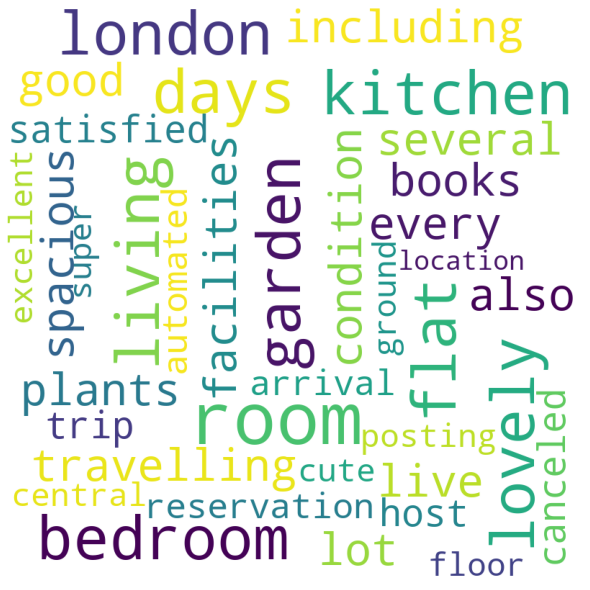

In [102]:
#importing all necessery modules
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS



wordcloud = WordCloud(width = 800, height = 800,
background_color ='white',
stopwords = a,#We don't want to see stopwords in the word clous
min_font_size = 10,
max_font_size=100,
max_words=50).generate(pos_words)


# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()